In [1]:
from utils.pre_processed import pre_processamento, potencia, alargamento, logaritmico, negativo
from utils.extraction import descritor_histograma, extract_features
from utils.utils import read_json, read_img, save, load_pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm_notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 1 Aquisição dos dados

In [3]:
path = read_json('../paths.json')

In [4]:
params = read_json('params.json')

In [5]:
df = pd.read_csv(path['metadata']+'metadataVarroa.csv')
df.head()

,image,label
0,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
1,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
2,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
3,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
4,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0


In [6]:
# 1 = infectada
# 0 = não infectada
df['label'].value_counts()

0    9562
1    3947
Name: label, dtype: int64

In [7]:
y = df['label'].to_numpy()

In [8]:
y.shape

(13509,)

In [9]:
dfSaf = df[df['label']==0].sort_values(by='image')
dfSaf.index = [i for i in range(len(dfSaf))]
dfSaf

,image,label
0,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
1,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
2,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
3,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
4,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
...,...,...
9557,2017-10-17_16-41-10.mp4-bee_id_7359-16410-1.png,0
9558,2017-10-17_16-41-10.mp4-bee_id_7360-16440-1.png,0
9559,2017-10-17_16-41-10.mp4-bee_id_7361-16455-1.png,0
9560,2017-10-17_16-41-10.mp4-bee_id_7364-16545-1.png,0


In [10]:
dfInf = df[df['label']==1].sort_values(by='image')
dfInf.index = [i for i in range(len(dfInf))]
dfInf

,image,label
0,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
1,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
2,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
3,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
4,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
...,...,...
3942,2017-10-17_16-41-10.mp4-bee_id_7358-16335-1.png,1
3943,2017-10-17_16-41-10.mp4-bee_id_7362-16455-1.png,1
3944,2017-10-17_16-41-10.mp4-bee_id_7366-16575-1.png,1
3945,2017-10-17_16-41-10.mp4-bee_id_7367-16620-1.png,1


In [11]:
dfBal = pd.concat([dfSaf.loc[:3899], dfInf.loc[:3899]])
dfBal.sort_values(by='image', inplace=True)
dfBal.index = [i for i in range(len(dfBal))]
dfBal

,image,label
0,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
1,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
2,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
3,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,1
4,2017-08-28_09-30-00-1_500_dirty_glass.mp4-bee_...,0
...,...,...
7795,2017-10-17_16-41-10.mp4-bee_id_7205-10770-1.png,1
7796,2017-10-17_16-41-10.mp4-bee_id_7207-10860-1.png,1
7797,2017-10-17_16-41-10.mp4-bee_id_7208-10875-1.png,1
7798,2017-10-17_16-41-10.mp4-bee_id_7209-10875-1.png,1


In [12]:
yBal = dfBal['label'].to_numpy()
yBal.shape

(7800,)

# 2 Pré - processamento

In [13]:
params

{'k': [5, 16, 20, 35],
 'e': [1.25, 1.55, 1.8, 2],
 'c': [9, 13, 30, 64],
 'gama': [0.57, 0.66, 0.84, 0.92]}

In [14]:
imgsAl = {}
imgsLog = {}
imgsPot = {}
imgsNeg = []

In [ ]:
#alargamento
for _k,_e in tqdm_notebook(zip(params['k'], params['e']), total=len(params['k'])):
    imgsAl[f'k{_k}_e{_e}'] = pre_processamento(path['img'], dfBal, alargamento, [_k, _e])

In [45]:
imgsAl.keys()

dict_keys(['k5_e1.25', 'k16_e1.55', 'k20_e1.8', 'k35_e2'])

In [ ]:
#logaritmo
for _c in tqdm_notebook(params['c']):
    imgsLog[f'c{_c}'] = pre_processamento(path['img'], dfBal, logaritmico, [_c])

In [16]:
imgsLog.keys()

dict_keys(['c9', 'c13', 'c30', 'c64'])

In [ ]:
#potencia
for _c, _gama in tqdm_notebook(zip(params['c'], params['gama']), total=len(params['c'])):
    imgsPot[f'c{_c}_gama{_gama}'] = pre_processamento(path['img'], dfBal, potencia, [_c, _gama])

In [17]:
imgsPot.keys()

dict_keys(['c30_gama0.84', 'c64_gama0.92'])

In [ ]:
#negativo
imgsNeg = pre_processamento(path['img'], dfBal, negativo)

# 3 Extração de características

In [35]:
save(y, path['pickle']+'labels.pickle')
save(yBal, path['pickle']+'labels_balancead.pickle')

Saved!
Saved!


In [36]:
yBal.shape, y.shape

((7800,), (13509,))

In [21]:
#original
xOriginal = extract_features(df, path=path['img'], op=0)

  0%|          | 0/13509 [00:00<?, ?it/s]

In [22]:
save(xOriginal, path['pickle']+'feats_original.pickle')

Saved!


In [23]:
xBalancead = extract_features(dfBal, path=path['img'], op=0)
save(xBalancead, path['pickle']+'feats_original_balancead.pickle')

  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


In [46]:
#alargamento
xAlargamento = {}
for _k,_e in tqdm_notebook(zip(params['k'], params['e']), total=len(params['k'])):
    xAlargamento[f'k{_k}_e{_e}'] = extract_features(imgsAl[f'k{_k}_e{_e}'])
    save(xAlargamento[f'k{_k}_e{_e}'] ,path['pickle']+f'feats_alargamento_k{_k}_e{_e}.pickle')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


In [17]:
xLogaritmo = {}
for _c in tqdm_notebook(params['c']):
    xLogaritmo[f'c{_c}'] = extract_features(imgsLog[f'c{_c}'])
    save(xLogaritmo[f'c{_c}'] , path['pickle']+f'feats_logaritmo_c{_c}.pickle')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


In [19]:
xPotencia = {}
for _c, _gama in tqdm_notebook(zip(params['c'], params['gama']), total=len(params['c'])):
    xPotencia[f'c{_c}_gama{_gama}'] = extract_features(imgsPot[f'c{_c}_gama{_gama}'])
    save(xPotencia[f'c{_c}_gama{_gama}'], path['pickle']+f'feats_potencia_c{_c}_gama{_gama}.pickle')

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


In [40]:
xNegativo = extract_features(imgsNeg)
save(xNegativo, path['pickle']+'feats_negative.pickle')

  0%|          | 0/7800 [00:00<?, ?it/s]

Saved!


## 3.1 Scatter plots

In [15]:
dfFeats = pd.DataFrame(xOriginal, columns=['media', 'variancia','skewness','entropia','energia','kurtosis'])
dfFeatsBal = pd.DataFrame(xBalancead,  columns=['media', 'variancia','skewness','entropia','energia','kurtosis'])

In [16]:
dfNew = pd.concat([df, dfFeats], axis=1)
dfNewBal = pd.concat([dfBal,dfFeatsBal], axis=1)

In [17]:
dfNew['label'].replace([1,0],['infectada','saudavel'],inplace=True)
dfNewBal['label'].replace([1,0],['infectada','saudavel'],inplace=True)

In [18]:
yNew = dfNew['label'].to_numpy()
yNewBal =  dfNewBal['label'].to_numpy()

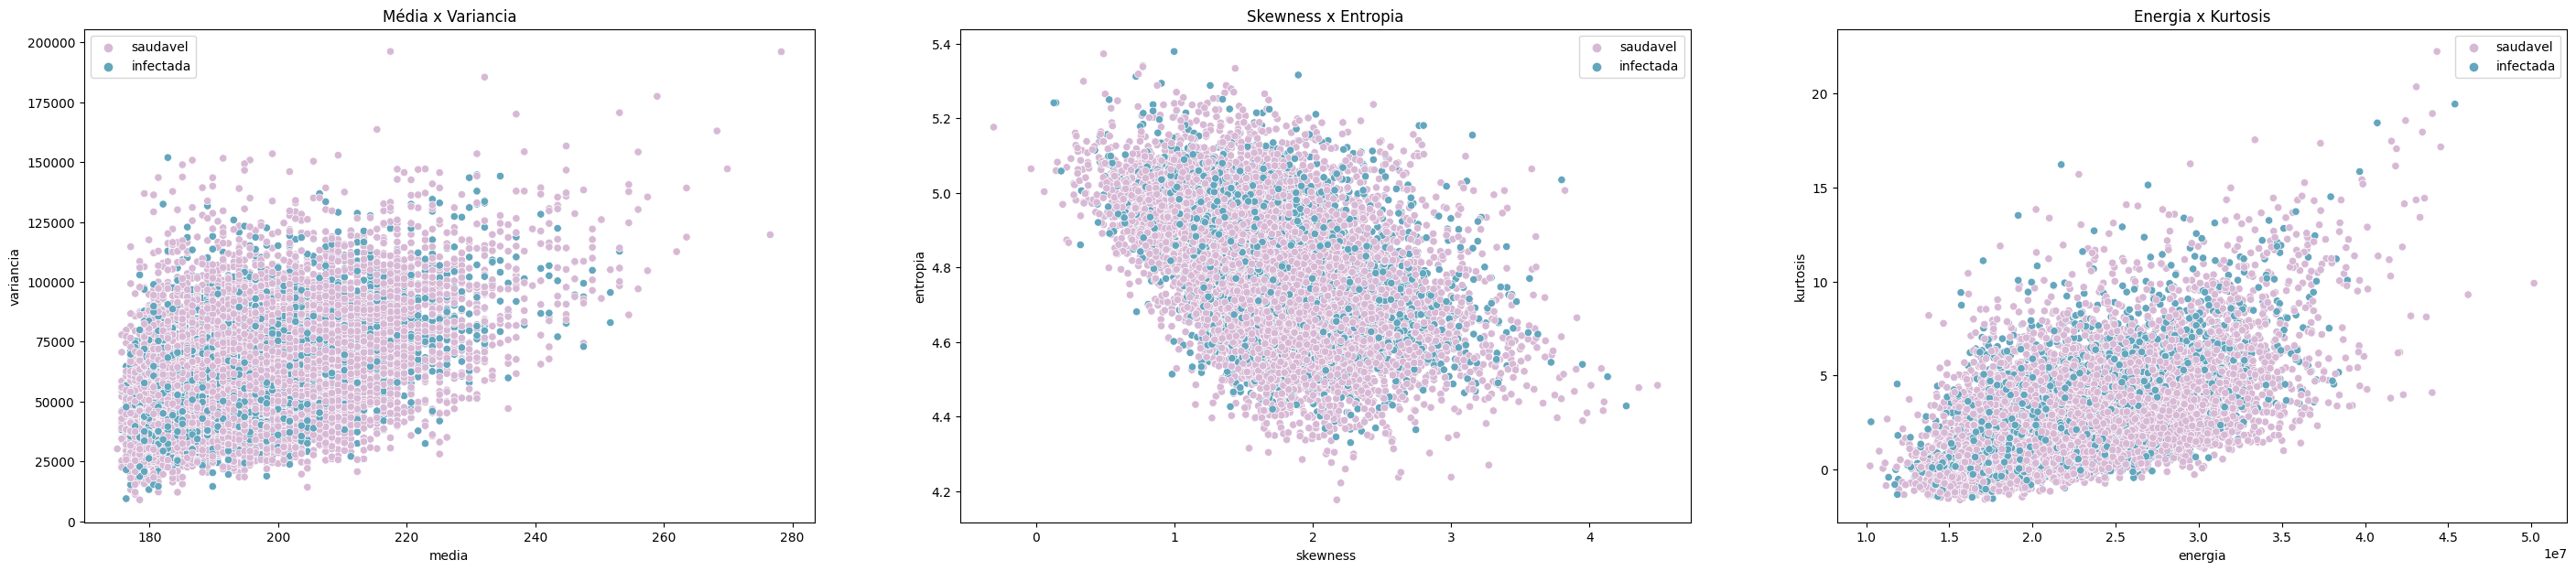

In [25]:
fig, ax = plt.subplots(1,3, figsize=(35,7))

sns.scatterplot(x=dfNew['media'],y=dfNew['variancia'],hue=yNew,palette=["#D7B9D5", "#64A6BD"], ax=ax[0])
ax[0].set_title('Média x Variancia')

sns.scatterplot(x=dfNew['skewness'],y=dfNew['entropia'],hue=yNew,palette=["#D7B9D5", "#64A6BD"], ax=ax[1])
ax[1].set_title('Skewness x Entropia')

sns.scatterplot(x=dfNew['energia'],y=dfNew['kurtosis'],hue=yNew,palette=["#D7B9D5", "#64A6BD"], ax=ax[2])
ax[2].set_title('Energia x Kurtosis')

plt.savefig(path['doc']+'scatter_plots.png')

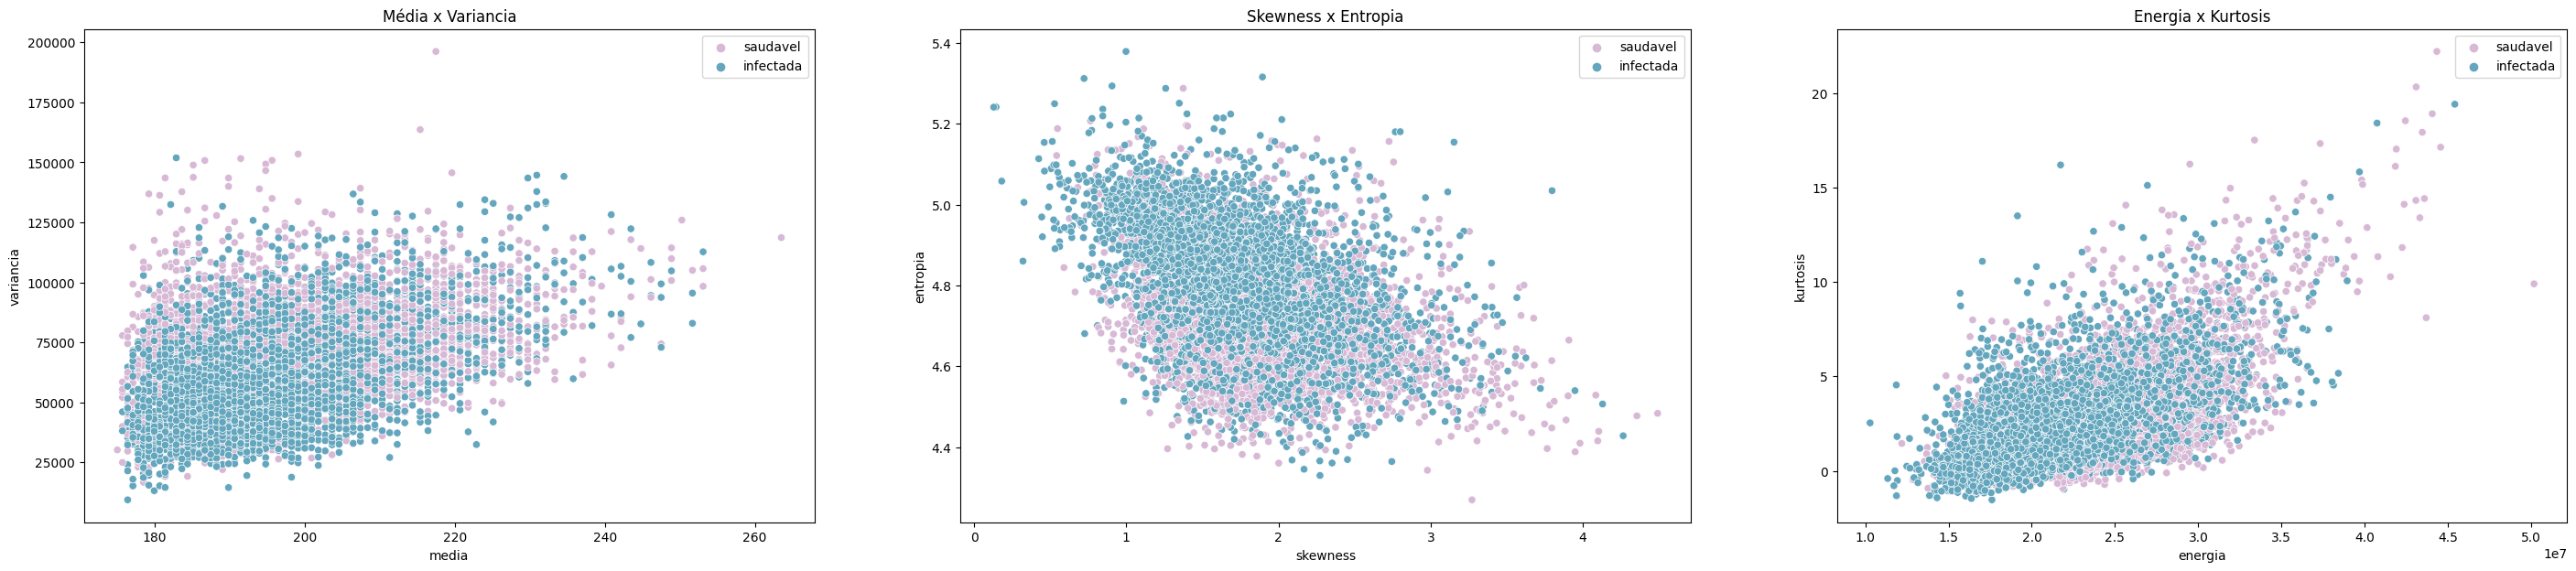

In [19]:
fig, ax = plt.subplots(1,3, figsize=(35,7))

sns.scatterplot(x=dfNewBal['media'],y=dfNewBal['variancia'],hue=yNewBal,palette=["#D7B9D5", "#64A6BD"], ax=ax[0])
ax[0].set_title('Média x Variancia')

sns.scatterplot(x=dfNewBal['skewness'],y=dfNewBal['entropia'],hue=yNewBal,palette=["#D7B9D5", "#64A6BD"], ax=ax[1])
ax[1].set_title('Skewness x Entropia')

sns.scatterplot(x=dfNewBal['energia'],y=dfNewBal['kurtosis'],hue=yNewBal,palette=["#D7B9D5", "#64A6BD"], ax=ax[2])
ax[2].set_title('Energia x Kurtosis')

plt.savefig(path['doc']+'scatter_plots_balancead.png')

## 3.2 PCA

In [26]:
def convert_df(x):
    df = pd.DataFrame(x, columns=['media', 'variancia','skewness','entropia','energia','kurtosis'])
    return df

In [27]:
def pca(x):
    if not(type(x)==pd.DataFrame):
        x = convert_df(x) 
    reducer = PCA(n_components=2,random_state=47)
    X = reducer.fit_transform(x)

    return X

In [28]:
def visualize_2d(X,y,title="",figsize=(15,8)):
    colors = ["#D7B9D5", "#64A6BD"]
    f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=figsize)
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,ax=ax1,palette=colors)
    ax1.set_title(title)
    title_img = title.replace(" ", "_")
    plt.savefig(path['doc']+title_img+'.png')
    plt.show()

In [29]:
xOriginalPCA = pca(dfFeats)
xBalanceadPCA = pca(dfFeatsBal)
xNegativoPCA = pca(xNegativo)

In [30]:
xAlargamentoPCA = {}
for _k,_e in tqdm_notebook(zip(params['k'], params['e']), total=len(params['k'])):
    xAlargamentoPCA[f'k{_k}_e{_e}'] = pca(xAlargamento[f'k{_k}_e{_e}'])

  0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
xLogaritmoPCA = {}
for _c in tqdm_notebook(params['c']):
    xLogaritmoPCA[f'c{_c}'] = pca(xLogaritmo[f'c{_c}'])

  0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
xPotenciaPCA = {}
for _c, _gama in tqdm_notebook(zip(params['c'], params['gama']), total=len(params['c'])):
    xPotenciaPCA[f'c{_c}_gama{_gama}'] = pca(xPotencia[f'c{_c}_gama{_gama}'])

  0%|          | 0/4 [00:00<?, ?it/s]

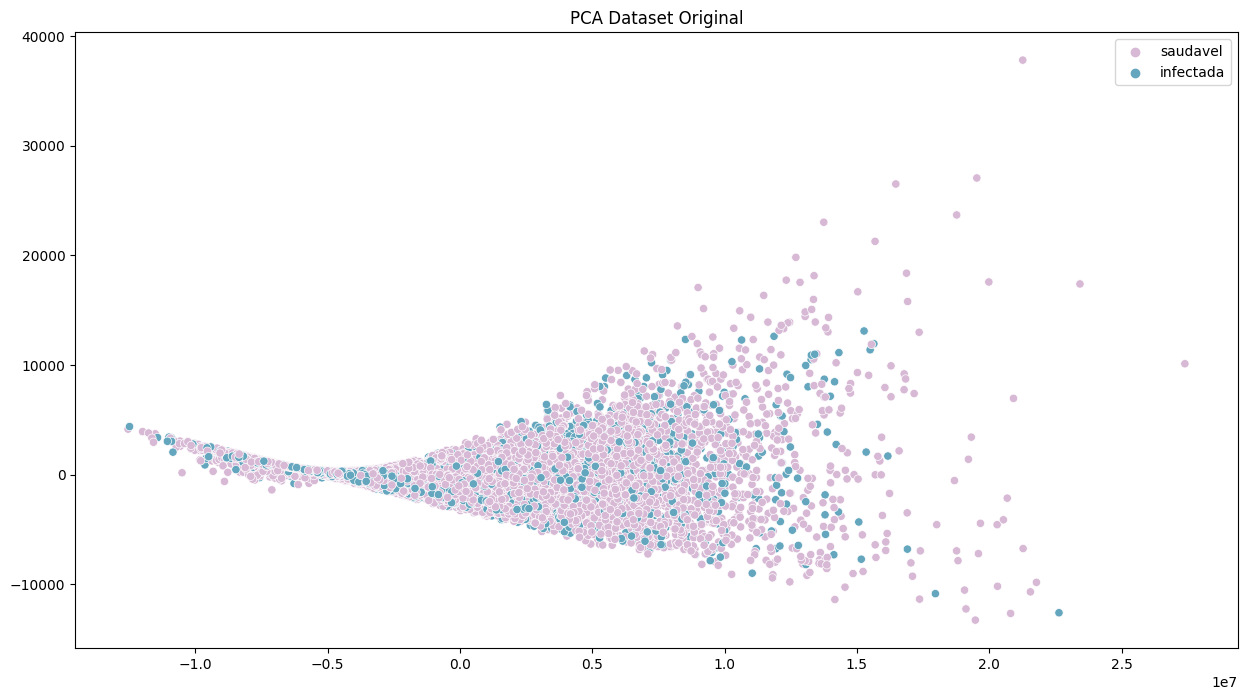

In [33]:
visualize_2d(xOriginalPCA,yNew,title='PCA Dataset Original')

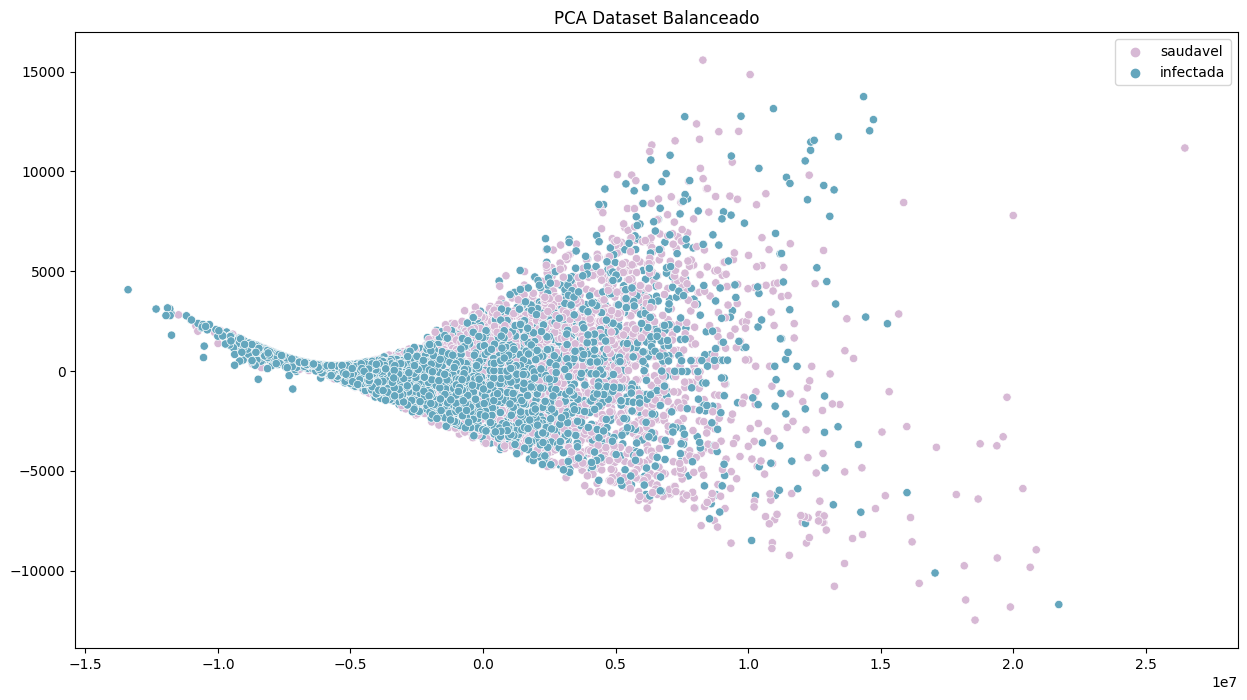

In [34]:
visualize_2d(xBalanceadPCA,yNewBal,title='PCA Dataset Balanceado')

# 4 Classificação

In [42]:
def classification(X,y):
    
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, shuffle=True, random_state=2)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = accuracy_score(y_test,pred)
    
    
    return acuracia

In [43]:
result = {}

In [44]:
result['original'] = {'descritor_6':classification(xOriginal,y),'descritor_pca':classification(xOriginalPCA,y)}
result['original_balanceamento'] = {'descritor_6':classification(xBalancead, yBal),'descritor_pca':classification(xBalanceadPCA,yBal)}
result['negativo'] = {'descritor_6':classification(xNegativo,yBal),'descritor_pca':classification(xNegativoPCA,yBal)}

In [45]:
for _k,_e in tqdm_notebook(zip(params['k'], params['e']), total=len(params['k'])):
    result[f'alargamento_k{_k}_e{_e}'] ={'descritor_6':classification(xAlargamento[f'k{_k}_e{_e}'],yBal),'descritor_pca':classification(xAlargamentoPCA[f'k{_k}_e{_e}'],yBal)}

  0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
for _c in tqdm_notebook(params['c']):
    result[f'logaritmo_c{_c}'] = {'descritor_6':classification(xLogaritmo[f'c{_c}'],yBal),'descritor_pca':classification(xLogaritmoPCA[f'c{_c}'],yBal)}

  0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
for _c, _gama in tqdm_notebook(zip(params['c'], params['gama']), total=len(params['c'])):
    result[f'potencia_c{_c}_gama{_gama}'] = {'descritor_6':classification(xPotencia[f'c{_c}_gama{_gama}'],yBal),'descritor_pca':classification(xPotenciaPCA[f'c{_c}_gama{_gama}'],yBal)}

  0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
dfRes = pd.DataFrame(result).T
dfRes['imagem'] = dfRes.index
dfRes.index = [i for i in range(len(result.keys()))]
dfRes = dfRes[['imagem','descritor_6','descritor_pca']]
dfRes

,imagem,descritor_6,descritor_pca
0,original,0.285714,0.504071
1,original_balanceamento,0.537179,0.706795
2,negativo,0.462821,0.601026
3,alargamento_k5_e1.25,0.523077,0.612821
4,alargamento_k16_e1.55,0.537579,0.627821
5,alargamento_k20_e1.8,0.527179,0.657179
6,alargamento_k35_e2,0.539879,0.715641
7,logaritmo_c9,0.468205,0.562821
8,logaritmo_c13,0.462821,0.567051
9,logaritmo_c30,0.535795,0.617051


In [51]:
dfRes.to_csv(path['csv']+'result_mlp.csv')